In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Does the table really never lie?
Does playing at home actually affect performance?
Are the referees biased towards home teams?

In [2]:
epl = pd.read_csv("epl2020.csv")
# epl

In [3]:
xptsr = []
for i in epl["xpts"]:
    if i < 0.75:
        i = 0
    elif i >= 0.75 and i <= 1.75:
        i = 1
    else:
        i = 3
    xptsr.append(i)
epl["xptsr"] = xptsr
# epl

In [4]:
xG = epl[["teamId", "xG", "xGA", "xpts", "xptsr"]]
xG["xGd"] = xG["xG"] - xG["xGA"]


C:\Users\Darne\AppData\Local\Temp\ipykernel_2860\1738204257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xG["xGd"] = xG["xG"] - xG["xGA"]


In [5]:
epl_short = ["xG", "xGA", "xGd", "xptsr"]
team = xG.groupby(["teamId"])
xG_table = team[epl_short].sum()
xscore = xG_table.sort_values(by="xG", ascending = False)
xgoals = xscore.sort_values(by="xGd", ascending = False)
xtable = xgoals.sort_values(by="xptsr", ascending = False)
xtable

,xG,xGA,xGd,xptsr
teamId,,,,
Liverpool,61.027651,28.689374,32.338277,74
Man City,73.078879,27.865359,45.213520,68
Chelsea,56.091577,31.137553,24.954024,62
Man Utd,49.062932,30.563618,18.499314,60
Wolves,44.624564,31.308262,13.316302,52
Leicester,47.772301,37.430000,10.342301,52
Everton,46.579852,37.236657,9.343195,50
Southampton,41.594446,45.149585,-3.555139,44
Arsenal,38.410292,42.428781,-4.018489,42


In [7]:
real=epl[["teamId", "scored", "missed","pts"]]
real["Gd"] = real["scored"] - real["missed"]

C:\Users\Darne\AppData\Local\Temp\ipykernel_14068\1642878024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real["Gd"] = real["scored"] - real["missed"]


Liverpool 1st to 1st (0)
City 2nd to 2nd (0)
Leicester 3rd to 6th (-3)
Chelsea 4th to 3rd (1)
Man Utd 5th to 4th (1)
Wolves 6th to 5th (1)
Sheffield 7th to 12th (-5)
Spurs 8th to 11th (-3)
Arsenal 9th to 10th (-1)
Burnley 10th to 9th (1)
Palace 11th to 15th (-4)
Everton 12th to 7th (5)
Toons 13th to 20th (-7)
So'ton 14th to 8th (6)
Brighton 15th to 14th (1)
West Ham 16th to 18th (-2)
Watford 17th to 13th (4)
Bo'mouth 18th to 17th (1)
Villa 19th to 19th (0)
Norwich 20th to 16th (4)
Average of 2.5 places

In [8]:
real_tab = ["scored", "missed", "Gd", "pts"]
teamr= real.groupby(["teamId"])
real_tab = teamr[real_tab].sum()
score = real_tab.sort_values(by="scored", ascending=False)
goals = score.sort_values(by="Gd", ascending=False)
table = goals.sort_values(by="pts", ascending=False)
table

,scored,missed,Gd,pts
teamId,,,,
Liverpool,66,21,45,82
Man City,68,31,37,57
Leicester,58,28,30,53
Chelsea,51,39,12,48
Man Utd,44,30,14,45
Wolves,41,34,7,43
Sheffield United,30,25,5,43
Tottenham,47,40,7,41
Arsenal,40,36,4,40


In [11]:
home_away = epl.groupby(["h_a"])
com_home = ["xG", "npxG", "deep", "scored", "xpts", "wins", "pts"]
home_up =  home_away[com_home].sum()
home_up["pxG"] = home_up["xG"] - home_up["npxG"]
home_up

,xG,npxG,deep,scored,xpts,wins,pts,pxG
h_a,,,,,,,,
a,384.998529,359.267989,1736,350,355.9954,87,333,25.730540
h,456.012244,430.893745,2079,434,445.8004,129,459,25.118499


In [12]:
com_away = ["xGA", "npxG", "deep_allowed", "missed", "xpts", "loses"]
away_up = home_away[com_away].sum()
away_up

,xGA,npxG,deep_allowed,missed,xpts,loses
h_a,,,,,,
a,456.012244,359.267989,2079,434,355.9954,129
h,384.998529,430.893745,1736,350,445.8004,87


In [13]:
foul = ["HF.x", "HY.x", "HR.x", "AF.x", "AY.x", "AR.x"]
ref = home_away[foul].sum()
ref

,HF.x,HY.x,HR.x,AF.x,AY.x,AR.x
h_a,,,,,,
a,2960,469,17,3140,540,18
h,2960,469,17,3140,540,18


Text(0, 0.5, 'Away')

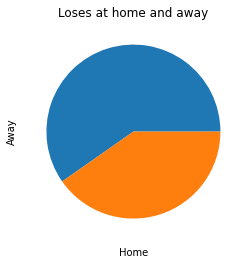

In [39]:
plt.pie(away_up["loses"])
plt.title("Loses at home and away")
plt.xlabel("Home")
plt.ylabel("Away")

Text(0, 0.5, 'Goals scored')

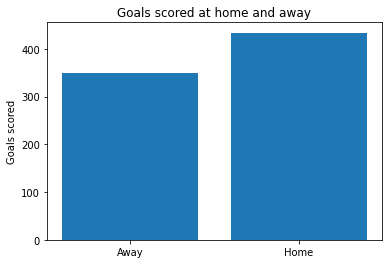

In [36]:
h_a = ["Away", "Home"]
ypos = np.arange(len(h_a))
plt.xticks(ypos, h_a)
plt.bar(ypos, home_up["scored"])
plt.title("Goals scored at home and away")
plt.ylabel("Goals scored")

In [70]:
measures = epl.groupby(["h_a", "teamId"])
factors = ["xG", "scored", "missed", "wins", "draws", "loses", "pts"]
ha_table = measures[factors].sum()
#score1 = ha_table.sort_values(by="scored", ascending=False)
# goals1 = score1.sort_values(by="Gd", ascending=False)
pts = ha_table.sort_values(by="pts", ascending=False)
# table1 = pts.sort_values(by="h_a", ascending=False)
# table1
pts
# ha_table

xG  scored  missed  wins  draws  loses  pts
h_a teamId                                                              
h   Liverpool         35.214100      40      12    15      0      0   45
a   Liverpool         25.813551      26       9    12      1      1   37
h   Leicester         22.297356      30      15     9      3      3   30
    Man Utd           28.072832      29      12     8      5      2   29
    Man City          34.702820      33      12     9      2      2   29
a   Man City          38.376059      35      19     9      1      5   28
h   Arsenal           22.123031      26      20     7      5      3   26
    Tottenham         20.485017      27      15     8      2      4   26
    Everton           23.423679      19      15     7      4      3   25
    Sheffield United  23.296733      17      13     7      3      5   24
a   Chelsea           22.868320      29      24     7      3      4   24
h   Chelsea           33.223257      22      15     7      3      5   24
    Burnley           25.820563      20      19     7      2      6   23
a   Leicester         25.474945      28      13     7      2      5   23
h   Crystal Palace    14.742824      12      13     6      4      5   22
    Wolves            22.684151      21      17     5      7      3   22
a   Wolves            21.940413      20      17     5      6      3   21
h   Newcastle United  13.490680      12      12     5      6      3   21
a   Southampton       21.408371      19      21     6      2      6   20
    Sheffield United  13.350469      13      12     4      7      2   19
h   Brighton          20.138339      17      15     4      6      4   18
a   Crystal Palace    13.016108      14      19     4      5      5   17
h   Watford           23.802857      16      17     4      5      5   17
    Aston Villa       17.955765      18      24     5      2      6   17
    Bournemouth       18.762070      17      21     4      5      5   17
a   Man Utd           20.990100      15      18     4      4      6   16
    Burnley           14.546319      14      21     4      4      6   16
h   West Ham          19.982191      23      26     4      3      7   15
    Norwich           15.607904      19      26     4      3      7   15
a   Tottenham         19.108358      20      25     3      6      6   15
    Newcastle United  12.428354      13      29     4      2      9   14
h   Southampton       20.186075      16      31     4      2      9   14
a   Arsenal           16.287261      14      16     2      8      3   14
    Everton           23.156173      18      31     3      3      9   12
    West Ham          14.963552      12      24     3      3      9   12
    Brighton          18.886979      15      25     2      5      8   11
    Watford           13.342933      11      27     2      4      9   10
    Bournemouth       15.469261      12      26     3      1     11   10
    Aston Villa       16.854724      16      32     2      2     11    8
    Norwich           16.716279       6      26     1      3     11    6

In [60]:
measures = epl.groupby(["teamId", "h_a"])
factors = ["xG", "scored", "missed", "wins", "draws", "loses", "pts"]
measures[factors].sum()

xG  scored  missed  wins  draws  loses  pts
teamId           h_a                                                    
Arsenal          a    16.287261      14      16     2      8      3   14
                 h    22.123031      26      20     7      5      3   26
Aston Villa      a    16.854724      16      32     2      2     11    8
                 h    17.955765      18      24     5      2      6   17
Bournemouth      a    15.469261      12      26     3      1     11   10
                 h    18.762070      17      21     4      5      5   17
Brighton         a    18.886979      15      25     2      5      8   11
                 h    20.138339      17      15     4      6      4   18
Burnley          a    14.546319      14      21     4      4      6   16
                 h    25.820563      20      19     7      2      6   23
Chelsea          a    22.868320      29      24     7      3      4   24
                 h    33.223257      22      15     7      3      5   24
Crystal Palace   a    13.016108      14      19     4      5      5   17
                 h    14.742824      12      13     6      4      5   22
Everton          a    23.156173      18      31     3      3      9   12
                 h    23.423679      19      15     7      4      3   25
Leicester        a    25.474945      28      13     7      2      5   23
                 h    22.297356      30      15     9      3      3   30
Liverpool        a    25.813551      26       9    12      1      1   37
                 h    35.214100      40      12    15      0      0   45
Man City         a    38.376059      35      19     9      1      5   28
                 h    34.702820      33      12     9      2      2   29
Man Utd          a    20.990100      15      18     4      4      6   16
                 h    28.072832      29      12     8      5      2   29
Newcastle United a    12.428354      13      29     4      2      9   14
                 h    13.490680      12      12     5      6      3   21
Norwich          a    16.716279       6      26     1      3     11    6
                 h    15.607904      19      26     4      3      7   15
Sheffield United a    13.350469      13      12     4      7      2   19
                 h    23.296733      17      13     7      3      5   24
Southampton      a    21.408371      19      21     6      2      6   20
                 h    20.186075      16      31     4      2      9   14
Tottenham        a    19.108358      20      25     3      6      6   15
                 h    20.485017      27      15     8      2      4   26
Watford          a    13.342933      11      27     2      4      9   10
                 h    23.802857      16      17     4      5      5   17
West Ham         a    14.963552      12      24     3      3      9   12
                 h    19.982191      23      26     4      3      7   15
Wolves           a    21.940413      20      17     5      6      3   21
                 h    22.684151      21      17     5      7      3   22